In [1]:
# 필요한 라이브러리 호출
import math
import torch
import matplotlib.pyplot as plt

In [2]:
# -pi부터 pi 사이에서 점을 1,000개 검출
x = torch.linspace(-math.pi, math.pi, 1000)

In [3]:
# 실제 사인곡선에서 추출한 값으로 y 만들기
y = torch.sin(x)

In [4]:
# 예측 사인곡선에 사용할 임의의 가중치(계수)를 뽑아 y 만들기
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

In [5]:
# 사인 함수를 근사할 3차 다항식 정의
y_random = a * x ** 3 + b * x ** 2 + c * x + d

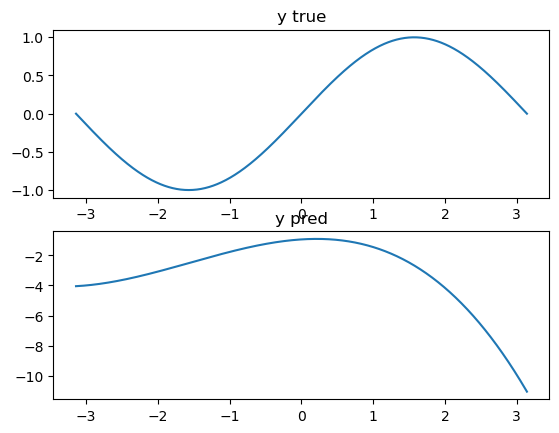

In [8]:
# 실제 사인곡선을 실제 y값으로 만들기
plt.subplot(2, 1, 1)
plt.title('y true')
plt.plot(x, y)

# 예측 사인곡선을 임의의 가중치로 만든 y값으로 만들기
plt.subplot(2, 1, 2)
plt.title('y pred')
plt.plot(x, y_random)

plt.show()

가중치 부여하여 학습

epoch:1 loss:15.854909896850586
epoch:101 loss:13.97315788269043
epoch:201 loss:12.402780532836914
epoch:301 loss:11.09196662902832
epoch:401 loss:9.997596740722656
epoch:501 loss:9.083749771118164
epoch:601 loss:8.320497512817383
epoch:701 loss:7.682892322540283
epoch:801 loss:7.150162696838379
epoch:901 loss:6.7049560546875
epoch:1001 loss:6.332851886749268
epoch:1101 loss:6.021780967712402
epoch:1201 loss:5.761689186096191
epoch:1301 loss:5.544180870056152
epoch:1401 loss:5.3622541427612305
epoch:1501 loss:5.210066795349121
epoch:1601 loss:5.082732200622559
epoch:1701 loss:4.9761810302734375
epoch:1801 loss:4.887003421783447
epoch:1901 loss:4.812356948852539


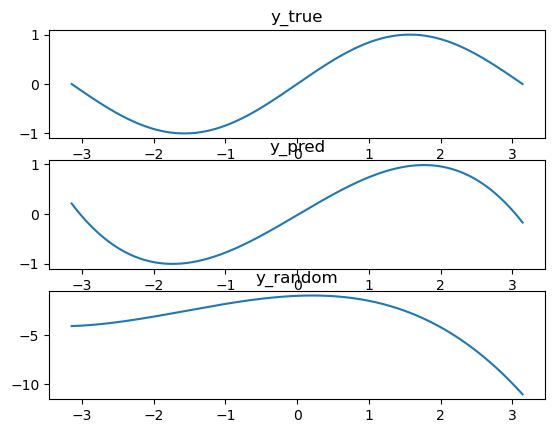

In [10]:
lr = 1e-6  # 학습률 정의

# 학습 2,000번 진행
for epoch in range(2000):
    y_pred = a * x ** 3 + b * x ** 2 + c * x + d

    loss = (y_pred - y).pow(2).sum().item()  # 손실 정의
    if epoch % 100 == 0:
        print(f'epoch:{epoch + 1} loss:{loss}')

    grad_y_pred = 2.0 * (y_pred - y)  # 기울기의 미분값
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    a -= lr*grad_a  # 가중치 업데이트
    b -= lr*grad_b
    c -= lr*grad_c
    d -= lr*grad_d

# 실제 사인 곡선 그리기
plt.subplot(3,1,1)
plt.title('y_true')
plt.plot(x, y)

# 예측한 가중치의 사인 곡선 그리기
plt.subplot(3,1,2)
plt.title('y_pred')
plt.plot(x, y_pred)

# 랜덤한 가중치의 사인 곡선 그리기
plt.subplot(3,1,3)
plt.title('y_random')
plt.plot(x, y_random)

plt.show()